In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
#R-squared is a statistical measure that represents the goodness of fit of a regression model. 
# The value of R-square lies between 0 to 1. Where we get R-square equals 1 when the model perfectly fits the data 

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
# Convert categorical columns to numeric values
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

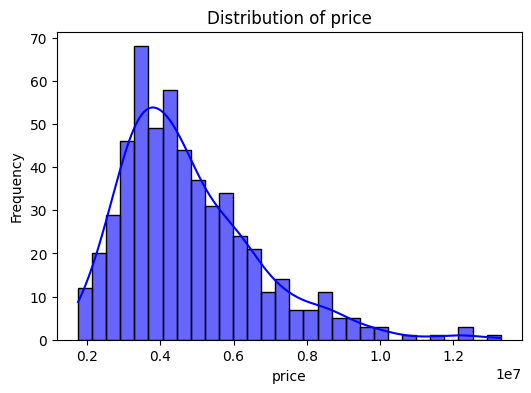

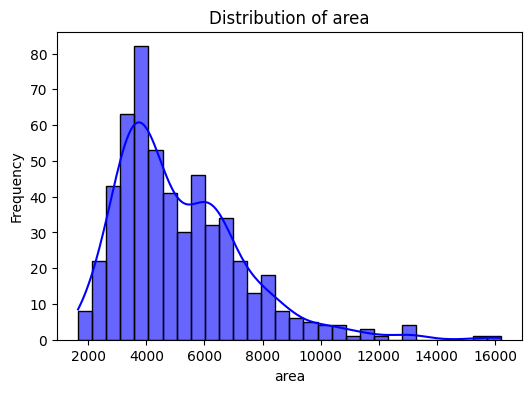

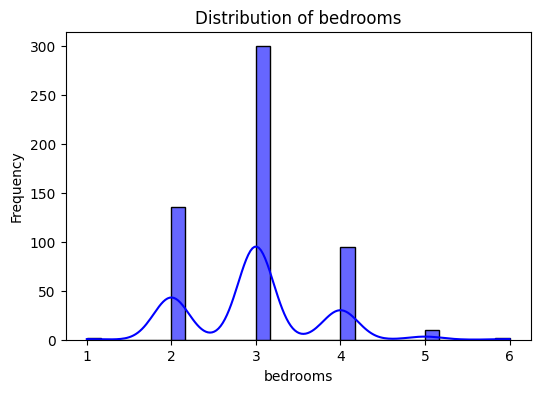

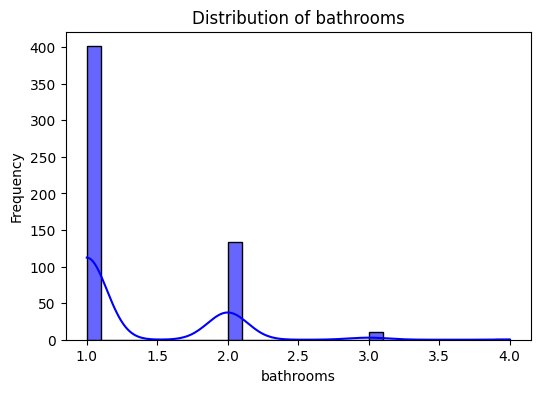

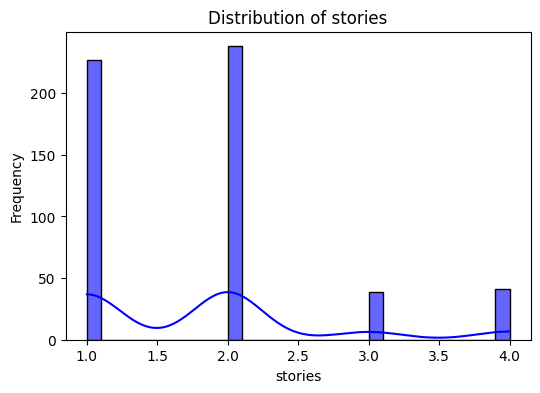

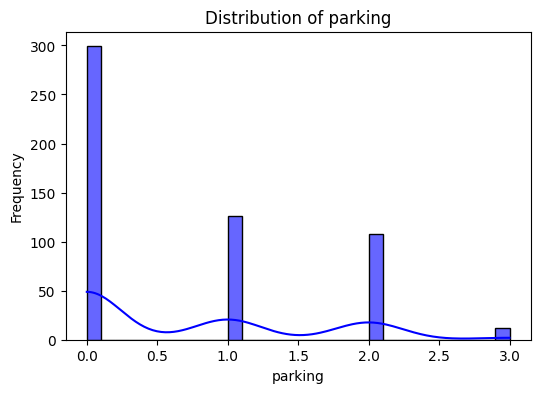

In [4]:
# univariate analysis - visualize distribution of numeric columns
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue', alpha=0.6) #alpha = transparency, kde for curve
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


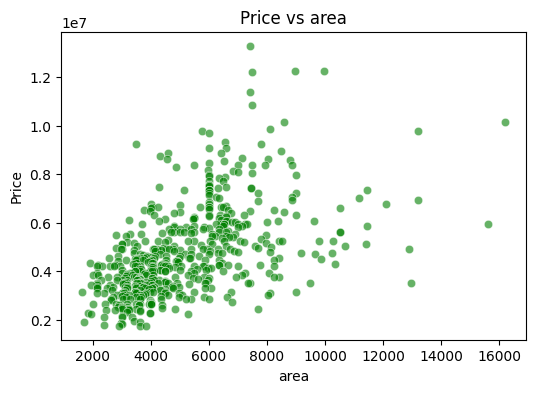

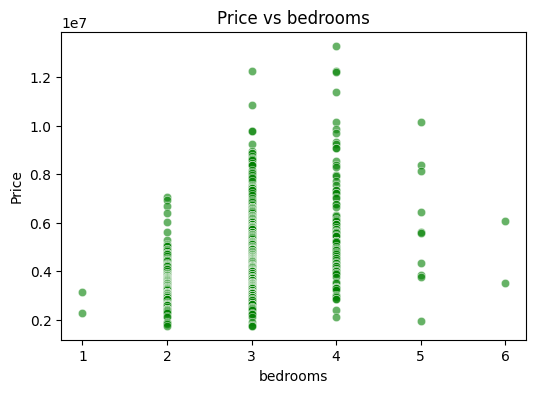

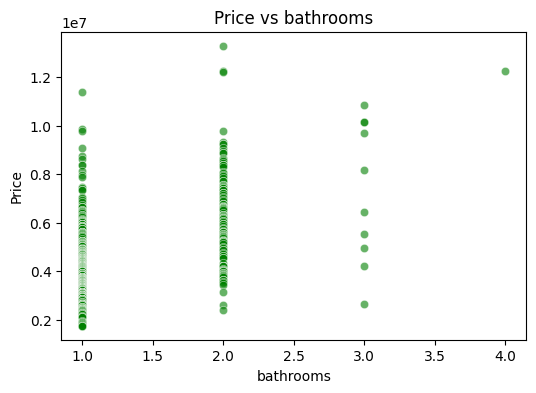

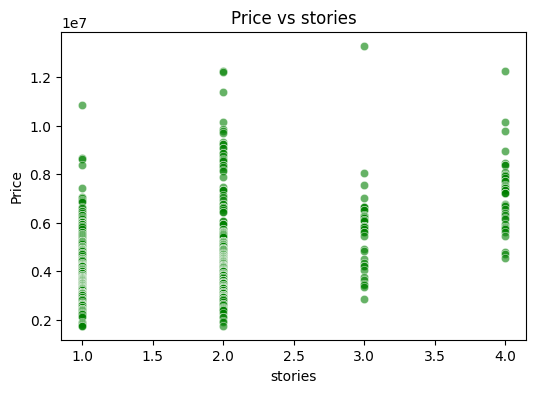

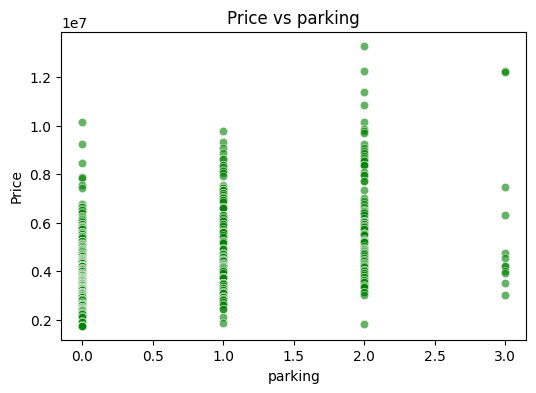

In [5]:
#bivariate analysis b/w price and other features
for col in numeric_cols[1:]:  # Skip 'price' itself
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['price'], color='green', alpha=0.6)
    plt.title(f"Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

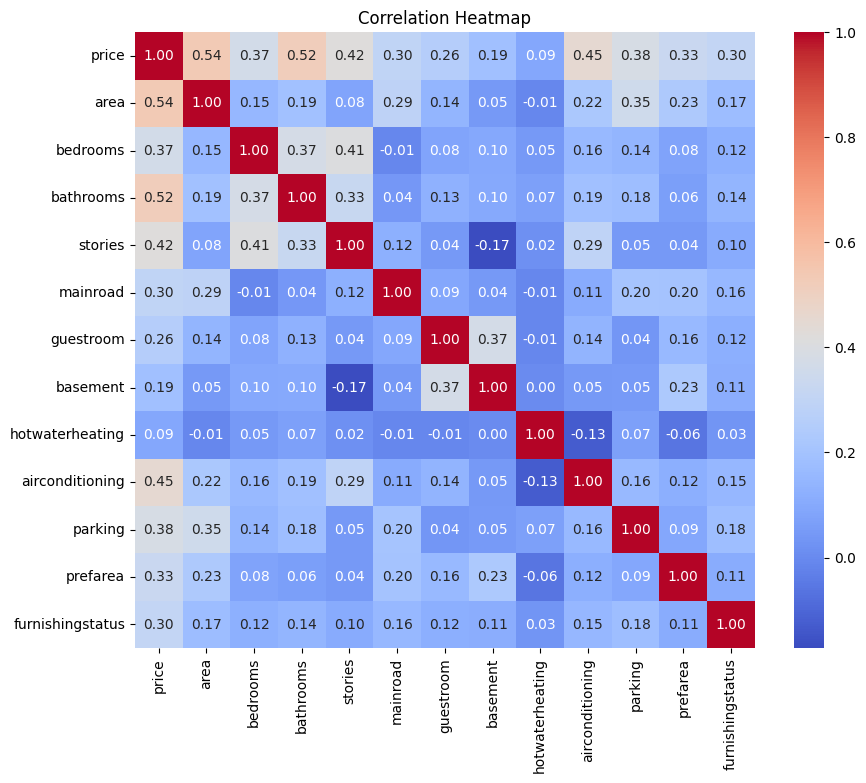

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

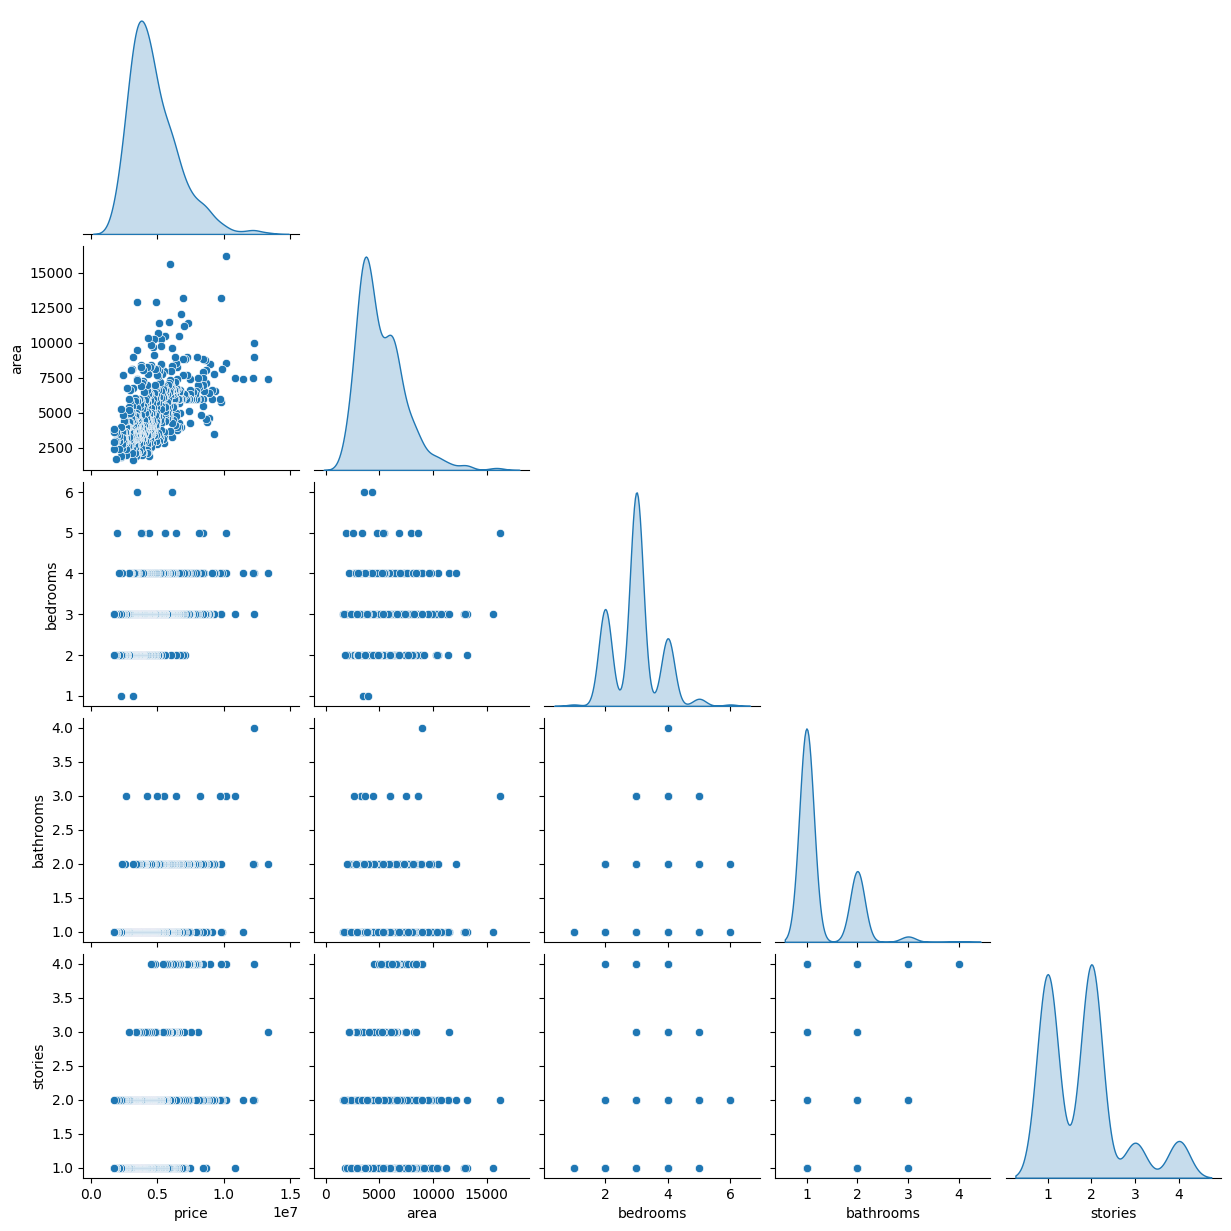

In [7]:
# Multivariate Analysis
# Pairplot of a subset of columns
subset_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']
sns.pairplot(df[subset_cols], diag_kind='kde', corner=True)
plt.show()

In [8]:
#Define dependent and independent variables
X = df.drop(['price'], axis=1)  # Independent variables - drop price and take rest
y = df['price']                # Dependent variable - using only price

#Split the data into training and testing sets , 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#random_state ensures creation of same test and train data set

In [9]:
# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test) #predict dependent with independent

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Model Evaluation:
Mean Squared Error (MSE): 1771751116594.0352
R-squared (R²): 0.6494754192267803


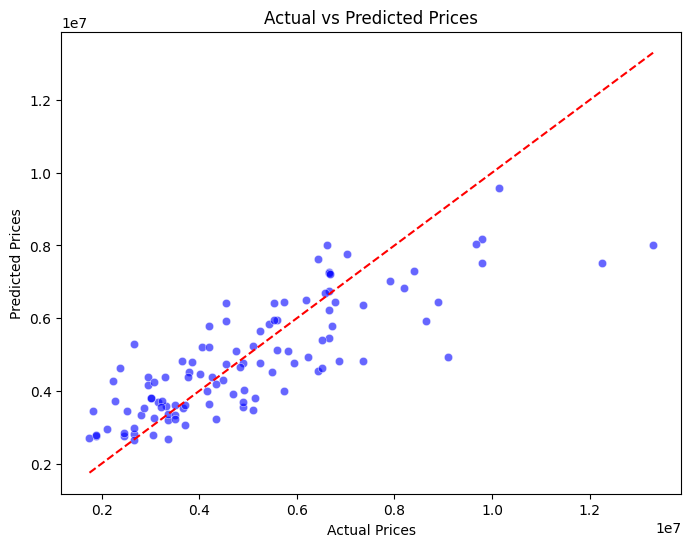

In [11]:
# Visualize the predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()